<a href="https://colab.research.google.com/github/towera7973/ML-PROJECTS/blob/main/fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install tf_keras
!pip install --quiet tf_keras
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"

import tensorflow as tf
import tf_keras as keras

# Now importing  specific layers from the legacy package
from tf_keras.models import Sequential
from tf_keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tf_keras.preprocessing.image import ImageDataGenerator

print(f"Keras version: {keras.__version__}")

import os
import numpy as np
import matplotlib.pyplot as plt
print(f"Keras version: {keras.__version__}")

Keras version: 2.19.0
Keras version: 2.19.0


In [12]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [38]:

train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)
val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

# Fix for the test generator
test_data_gen = test_image_generator.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False
)

print(f"Test images found: {test_data_gen.n}")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.
Test images found: 50


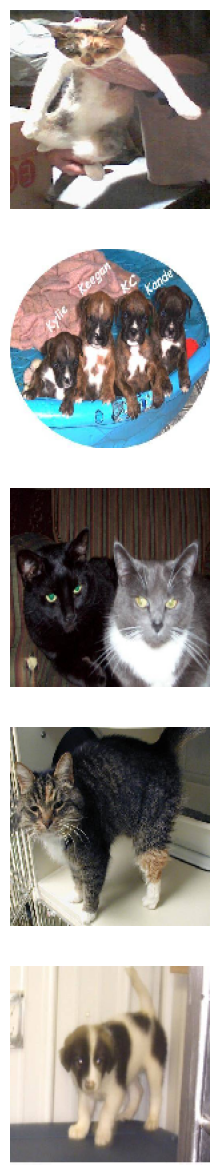

In [23]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

In [24]:
# 5 we recreate the images using data argumantation
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.5,
    fill_mode='nearest'
)


Found 2000 images belonging to 2 classes.


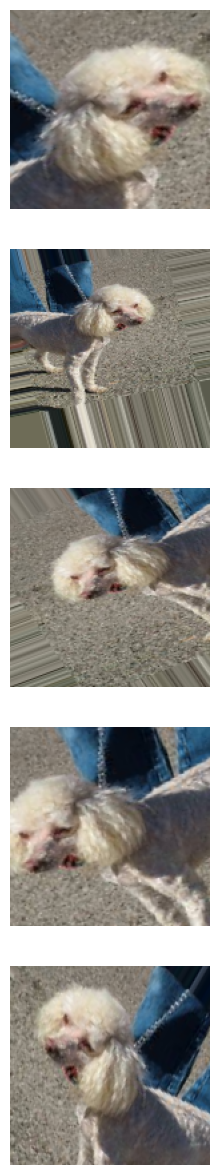

In [25]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [26]:

model = Sequential([
    # i use 32 filters to start, each 3x3 pixels in size
    Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)),
    MaxPooling2D(2, 2),

    # Increasing filters to 64 to capture more complex patterns
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # 128 filters for even deeper feature extraction (textures, shapes)
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Cflattening  the 2D feature maps into a 1D vector
    Flatten(),

    # 5. Fully Connected (Dense) Layer
    # 512 neurons to "interpret" the features found by the convolutions
    Dense(512, activation='relu'),

    # 1 neuron with Sigmoid activation gives a probability (0 to 1)
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']

)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [27]:
# 8
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.n // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
)

Epoch 1/15
15/15 [==============================] - 119s 8s/step - loss: 1.0519 - accuracy: 0.5299 - val_loss: 0.6877 - val_accuracy: 0.5990
Epoch 2/15
15/15 [==============================] - 114s 7s/step - loss: 0.6913 - accuracy: 0.5326 - val_loss: 0.6867 - val_accuracy: 0.5060
Epoch 3/15
15/15 [==============================] - 113s 7s/step - loss: 0.6887 - accuracy: 0.5497 - val_loss: 0.6909 - val_accuracy: 0.5270
Epoch 4/15
15/15 [==============================] - 113s 8s/step - loss: 0.6900 - accuracy: 0.5310 - val_loss: 0.6877 - val_accuracy: 0.5600
Epoch 5/15
15/15 [==============================] - 112s 7s/step - loss: 0.6806 - accuracy: 0.5924 - val_loss: 0.6689 - val_accuracy: 0.5920
Epoch 6/15
15/15 [==============================] - 119s 8s/step - loss: 0.6770 - accuracy: 0.5759 - val_loss: 0.6664 - val_accuracy: 0.5590
Epoch 7/15
15/15 [==============================] - 114s 8s/step - loss: 0.6663 - accuracy: 0.6016 - val_loss: 0.7057 - val_accuracy: 0.5610
Epoch 8/15
15

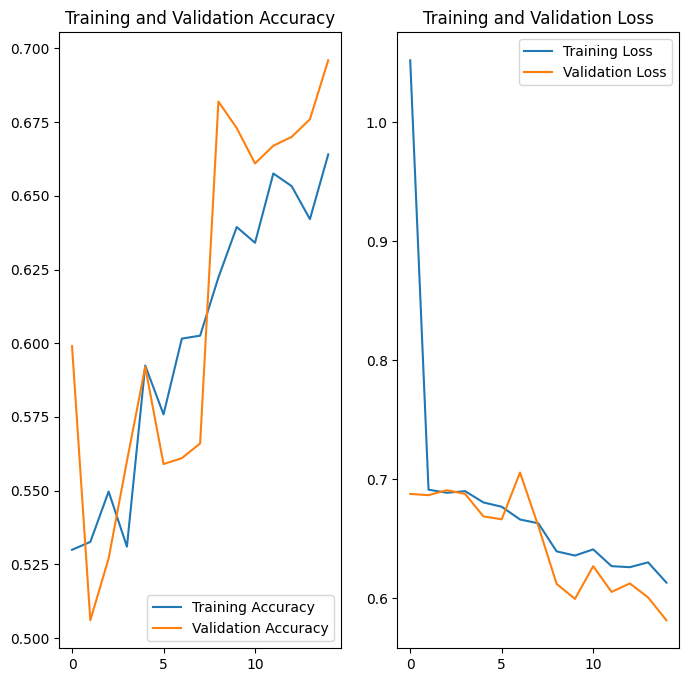

In [28]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
predictions = model.predict(test_data_gen, steps=len(test_data_gen))

1/1 [==============================] - 1s 762ms/step


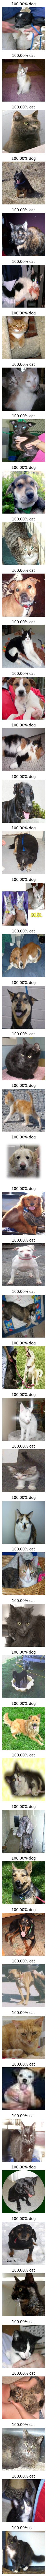

In [44]:


#  Converting probabilities into a list of integers
# If the value is > 0.5, it's a 1 (Dog), otherwise it's a 0 (Cat)
probabilities = [1 if x > 0.5 else 0 for x in predictions]

# 3. Retrieve the images from the generator to plot them
# Note: This assumes test_data_gen has a batch size of 50 or
# we are pulling the first batch.
test_images = next(test_data_gen)

# Passing the 50 images and their corresponding predicted labels
plotImages(test_images, probabilities)

In [45]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 72.0% of the images of cats and dogs.
You passed the challenge!
